# Reinforcement Learning - Sutton and Barto
# Exercise 7.2

n-step TD Methods Comparison

In [1]:
import numpy as np
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

from RandomWalk import randomwalk
import n_step_TD as agent

# Random Walk

## Initialize Environment

In [2]:
env = randomwalk()

Actions: [array([0, 1]), array([ 0, -1])]


C:\users\cafaya\OneDrive - Emerson\Documents\MyTrainings\AI_Training\RL_Sutton_Barton_Studies\Chapter 7\RandomWalk.py:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  self.ax.set_xticklabels(["0", "T", "A", "B", "C", "D", "E", "T"])


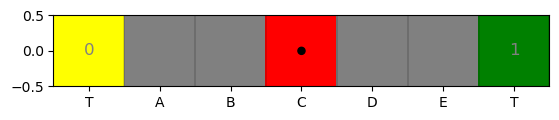

In [3]:
env.render()

## Test the policy $\pi(s)$

In [4]:
for i in range (10):
    action = env.policy()
    print(f"Action taken: {action}")

Action taken: 0
Action taken: 0
Action taken: 0
Action taken: 1
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 0
Action taken: 1
Action taken: 1


# Execute both models

In [5]:
size = env.observation_space[1]

n = 4
state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
print(f"State Values: {state_values}")
n_step_td_history = agent.n_step_td_estimating(env, state_values, episodes=10, n=n, alpha=0.1, debug=False)

State Values: [[0.5 0.5 0.5 0.5 0.5 0.5 0.5]]
Episode: 1 Finished | Average Steps: 14.0
Episode: 2 Finished | Average Steps: 18.0
Episode: 3 Finished | Average Steps: 12.0
Episode: 4 Finished | Average Steps: 10.0
Episode: 5 Finished | Average Steps: 12.0
Episode: 6 Finished | Average Steps: 22.0
Episode: 7 Finished | Average Steps: 24.0
Episode: 8 Finished | Average Steps: 10.0
Episode: 9 Finished | Average Steps: 18.0
Episode: 10 Finished | Average Steps: 8.0
Total number of episodes: 10
Total number of steps: 148
Total Average of Steps Per Episode: 14.8


In [6]:
n_step_td_history

[array([0.405, 0.405, 0.5  , 0.5  , 0.5  ]),
 array([0.32805, 0.32805, 0.4905 , 0.48195, 0.4905 ]),
 array([0.2657205, 0.2657205, 0.4596345, 0.46656  , 0.4905   ]),
 array([0.2657205 , 0.28580445, 0.46549894, 0.5679136 , 0.587305  ]),
 array([0.2657205 , 0.35722401, 0.5299116 , 0.61112224, 0.6285745 ]),
 array([0.30031876, 0.44001079, 0.56113493, 0.60659342, 0.65053283]),
 array([0.33396434, 0.52193163, 0.59530632, 0.62029701, 0.67309704]),
 array([0.33396434, 0.53176817, 0.61008656, 0.69244058, 0.73520861]),
 array([0.3005679 , 0.43073222, 0.5242269 , 0.66191282, 0.73520861]),
 array([0.24346   , 0.3488931 , 0.501861  , 0.66191282, 0.73520861])]

In [7]:
state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
td_err_history = agent.sum_td_errors_estimating(env, state_values, episodes=10, n=n, alpha=0.1, debug=True)

---------------------------
Step: 0
Action: 0
Transitions: [array([0, 3]), array([0, 4])]
Rewards: [0, 0]
---------------------------
Step: 1
Action: 1
Transitions: [array([0, 3]), array([0, 4]), array([0, 3])]
Rewards: [0, 0, 0]
---------------------------
Step: 2
Action: 1
Transitions: [array([0, 3]), array([0, 4]), array([0, 3]), array([0, 2])]
Rewards: [0, 0, 0, 0]
---------------------------
Step: 3
Action: 0
Transitions: [array([0, 3]), array([0, 4]), array([0, 3]), array([0, 2]), array([0, 3])]
Rewards: [0, 0, 0, 0, 0]
---------------------------
Step: 4
Action: 0
Transitions: [array([0, 3]), array([0, 4]), array([0, 3]), array([0, 2]), array([0, 3]), array([0, 4])]
Rewards: [0, 0, 0, 0, 0, 0]
---------------------------
Step: 5
Action: 0
Transitions: [array([0, 3]), array([0, 4]), array([0, 3]), array([0, 2]), array([0, 3]), array([0, 4]), array([0, 5])]
Rewards: [0, 0, 0, 0, 0, 0, 0]
---------------------------
Step: 6
Action: 1
Transitions: [array([0, 3]), array([0, 4]), arra

In [ ]:
td_err_history

In [ ]:
v_star = np.arange(1, size - 2 + 1) / (size - 2 + 1)

In [ ]:
v_star

In [ ]:
plt.figure()
plt.title(f"Learning Curves (n={n})")
plt.xlabel("Episodes")
plt.ylabel("RMS Error")
rms0 = np.sqrt((np.mean(n_step_td_history - v_star, axis=1) ** 2))      
rms1 = np.sqrt((np.mean(td_err_history - v_star, axis=1) ** 2))
plt.plot(rms0, label='Online')
plt.plot(rms1, label='TD Error Sum')
plt.legend()
plt.show()


plt.figure()
plt.title(f"Value Function (n={n})")
plt.xlabel("State")
plt.ylabel("Value")
plt.xticks(range(size + 1), [chr(ord('A') + i) for i in range(size + 1)])
plt.plot(n_step_td_history[-1], 'o-', label='Online')
plt.plot(td_err_history[-1], 'x-', label='TD Error Sum')
plt.plot(v_star, 'o--', color='gray', label='Theoretical')
plt.legend()
plt.show()

In [ ]:
ns = [2, 4, 8]
alphas = np.linspace(0, 0.5, num=20)
rms10int0 = np.zeros([len(ns), len(alphas)])
rms10int1 = np.zeros([len(ns), len(alphas)])

for i, n in enumerate(ns):
    for j, alpha in enumerate(alphas):

        state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
        history0 = agent.n_step_td_estimating(env, state_values, episodes=10, n=n, alpha=alpha, debug=False)

        rmsint0 = np.sqrt((history0 - v_star) ** 2).mean()
        rms10int0[i, j] = rmsint0
        
        
        state_values = agent.initialize_state_values((env.observation_space[0],env.observation_space[1]))
        history1 = agent.sum_td_errors_estimating(env, state_values, episodes=10, n=n, alpha=alpha, debug=False)

        rmsint1 = np.sqrt((history1 - v_star) ** 2).mean()
        rms10int1[i, j] = rmsint1

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

plt.figure()
plt.title(f"RMS Mean")
plt.xlabel(r"$\alpha$"); plt.ylim([0, 0.55])
plt.ylabel("RMS Mean Error Over First 10 Episodes")
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int0[i, :], 'o-', label=f'Online (n={n})')
for i, n in enumerate(ns):
    plt.plot(alphas, rms10int1[i, :], 'x-', label=f'TD Error Sum (n={n})')
plt.legend(loc=0)
plt.show()